In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users \Aryaneh\Desktop\BTC-USD.csv")
df.head()
#df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [4]:
df["Date"]
df["Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2713 entries, 0 to 2712
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
2713 non-null   object
dtypes: object(1)
memory usage: 21.3+ KB


In [5]:
date =  df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce', dayfirst = True)
date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2713 entries, 0 to 2712
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
2713 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.3 KB


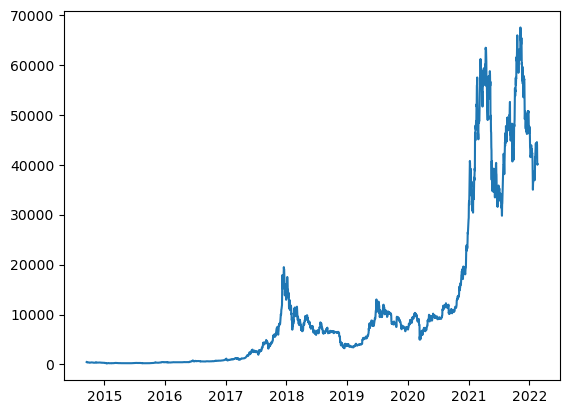

In [7]:
plt.plot(date , df["Close"])

In [8]:
x = np.asanyarray(df[["Open" , "High", "Low" , "Volume"]])
y = np.asanyarray(df["Close"])

In [9]:
msk = np.random.rand(len(df)) < .8
train_x = x[msk]
train_y = y[msk]

test_x = x[~msk]
test_y = y[~msk]

In [10]:
#from sklearn import preprocessing
y_data = y/max(y)


In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
fit_data = reg.fit(train_x,train_y)
print("Coef: ", fit_data.coef_ )
print("intercept:" , fit_data.intercept_)

Coef:  [-5.55885802e-01  9.07291604e-01  6.43033630e-01  9.63684464e-10]
intercept: 1.3710704309069115


In [12]:
reg.score(train_x , train_y)

0.9995930553276834

In [15]:
reg.score(test_x , test_y)

0.9995933997318839

In [16]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200


In [19]:
fit_data.predict([[465.864014 , 458.174011 , 413.104004 , 34483200]])

array([423.77431085])